# Zomato project data analysis

# Step - 1 create dataframe

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Zomato data .csv')
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Step - 2 convert data type of column Rate

In [3]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(handlerate)

In [4]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type of retaurent

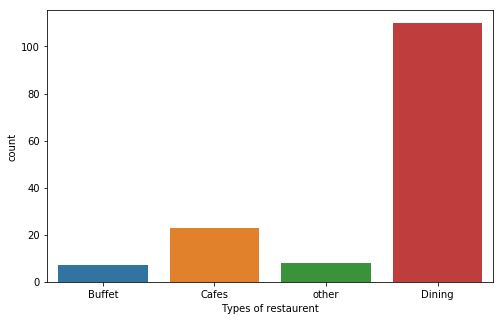

In [6]:
plt.figure(figsize = (8,5))
sns.countplot(x = df['listed_in(type)'])
plt.xlabel('Types of restaurent')
plt.show()

# conclusion - majority of  the restaurent falls in dining category

Text(0,0.5,'votes')

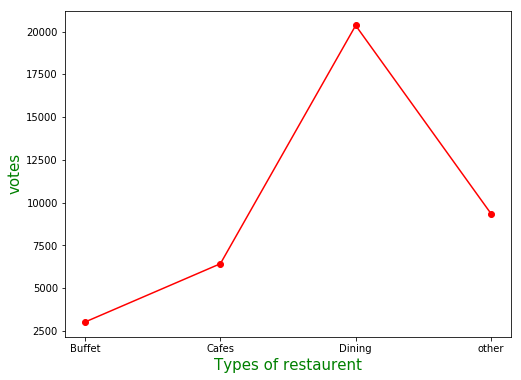

In [12]:
rest_grp = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : rest_grp })

plt.figure(figsize = (8,6))
plt.plot(result, color = 'red', marker ='o')
plt.xlabel("Types of restaurent", color ='green', size = 15)
plt.ylabel("votes", color = 'green', size = 15)

# conclusion - dining restaurent has recieved maximum votes

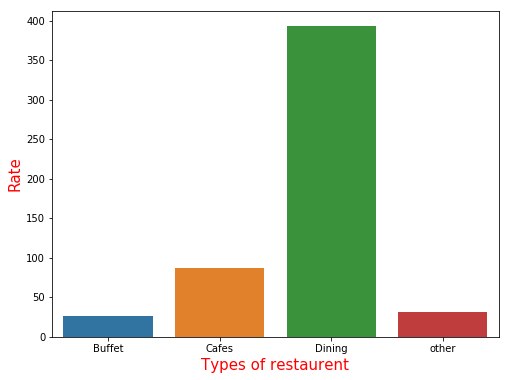

In [20]:
rating_grp = df.groupby('listed_in(type)',as_index =False)['rate'].sum()

plt.figure(figsize = (8,6))
sns.barplot(x ='listed_in(type)', y ='rate', data = rating_grp)
plt.xlabel('Types of restaurent', color = 'red', size = 15)
plt.ylabel('Rate', color = 'red', size = 15)
plt.show()

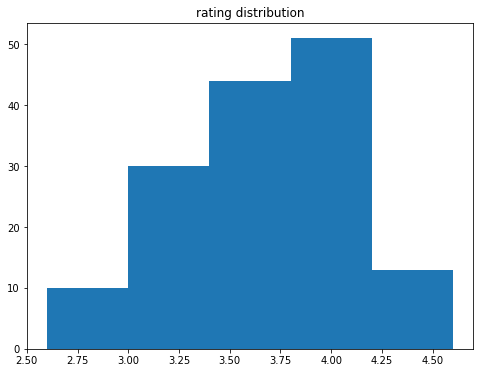

In [23]:
plt.figure(figsize = (8,6))
plt.hist(df['rate'],bins = 5)
plt.title('rating distribution')
plt.show()

# coclusion - the majority restaurent recieve rating from 3.5 to 4.2

# Average order speding by couples

In [25]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


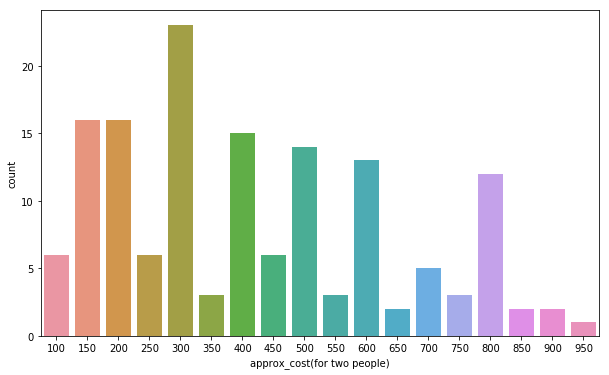

In [28]:
plt.figure(figsize = (10,6))
couple_data = df['approx_cost(for two people)']
sns.countplot(couple_data)
plt.show()

# conclusion - the majority of couples prefer restaurent with an approximate cost of 300 rs

In [29]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# which mode recive maximum rating

Text(0,0.5,'rating')

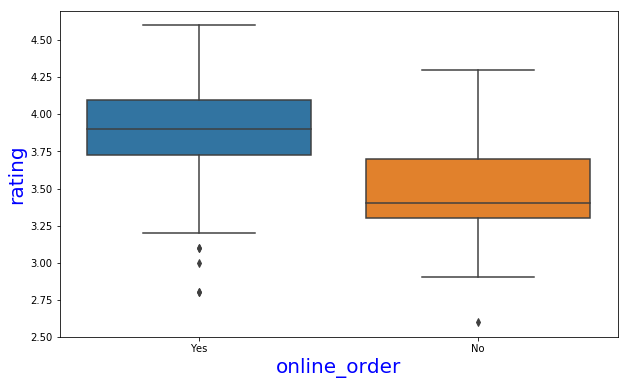

In [31]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)
plt.xlabel('online_order', color = 'blue', size = 20)
plt.ylabel('rating', color = 'blue', size = 20)

# conclusion - offline orders recieve lower rating in comparison to online orders

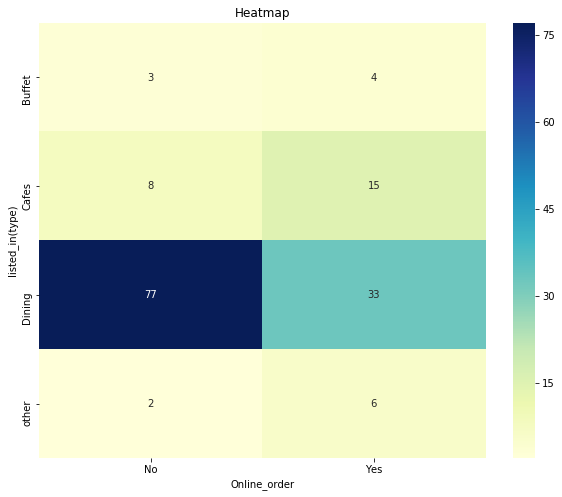

In [37]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order' ,aggfunc='size',fill_value=0)

plt.figure(figsize = (10,8))
sns.heatmap(pivot_table, annot= True,cmap='YlGnBu', fmt='d' )
plt.title('Heatmap')
plt.xlabel('Online_order')
plt.ylabel('listed_in(type)')
plt.show()

# conclusion - Dining restaurents primarly accept offline oreders, whereas primarly recieve online orders. this suuggest that clients prefer to  place order in person at restaurent, but prefer online ordering at cafe